In [1]:
!pip install matplotlib
!pip install matplotlib-venn
!pip install -U scikit-learn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev
! pip install -U libarchive
!apt-get -qq install -y graphviz 
!pip install pydot
# !pip install cartopy
import pydot 
# import cartopy
!pip install roc-utils



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for libarchive: started
  Running setup.py install for libarchive: finished with status 'error'


  DEPRECATION: libarchive is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  Running setup.py install for libarchive did not run successfully.
  exit code: 1
  
  [6 lines of output]
  running install
  C:\Users\jaydeep\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
    warnings.warn(
  error: Could not find module 'libarchive.so' (or one of its dependencies). Try using the full path with constructor syntax.
  Verifying that the library is accessible.
  Library can not be loaded: Could not find module 'libarchive.so' (or


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#--- basic
import sklearn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#--- visualization
import matplotlib.pyplot as plt
import seaborn as sns
#--- model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
#--- processing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#-- evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
#from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# m = 1   b = 0
df = df.drop(['id','Unnamed: 32'],axis=1)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=['unique count']).transpose()

,unique count
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

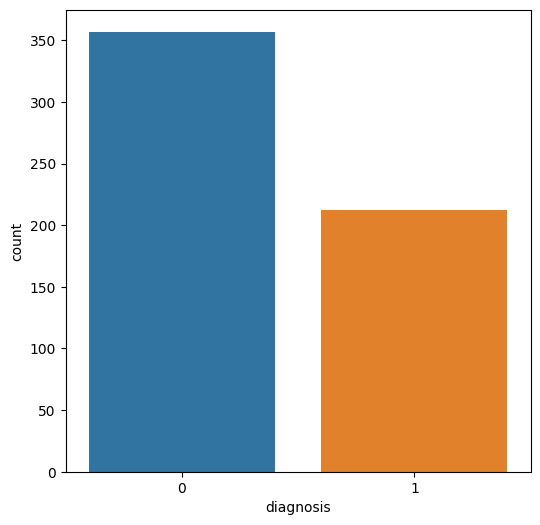

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
fig, ax = plt.subplots(figsize=(6,6))
# print(df['diagnosis'])
sns.countplot(x= df['diagnosis'])
plt.show()

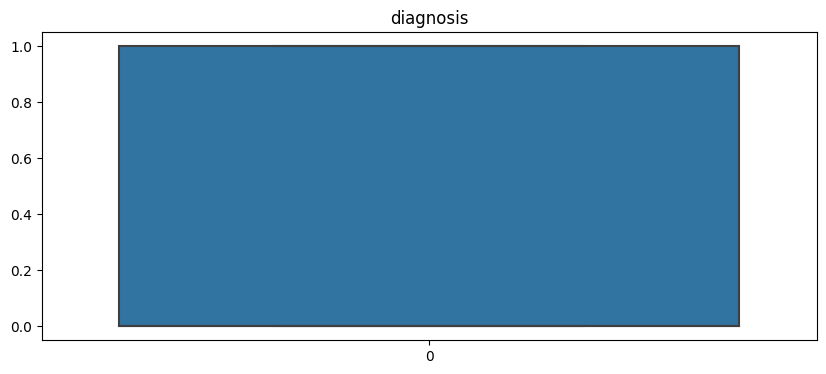

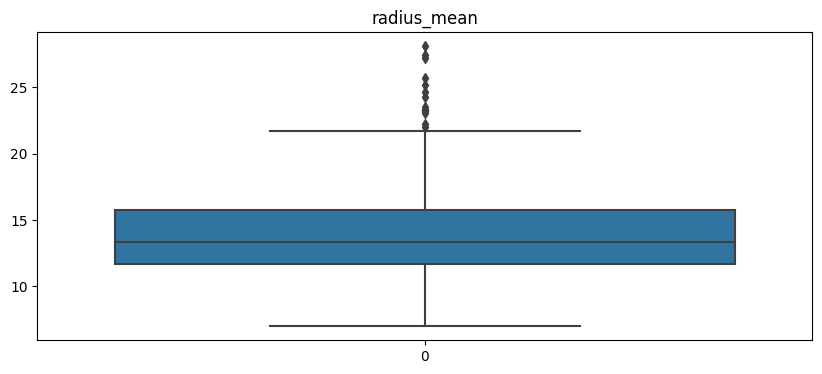

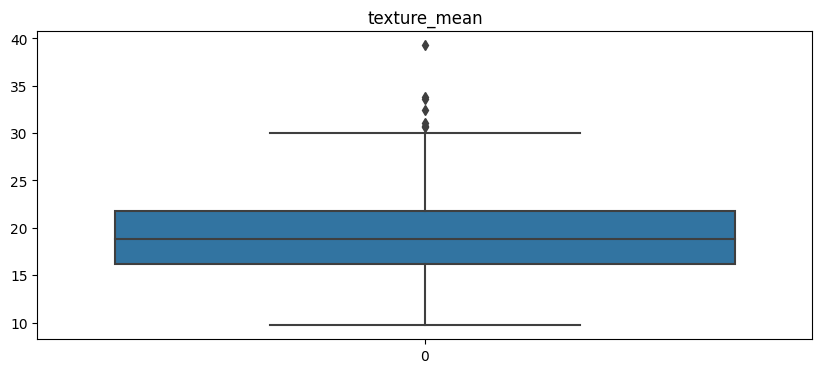

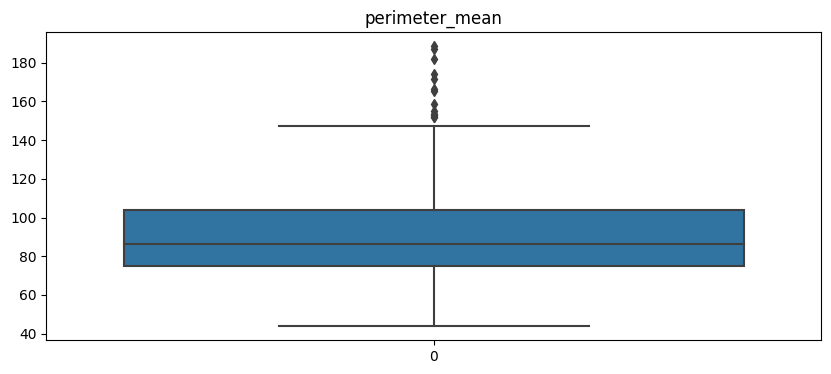

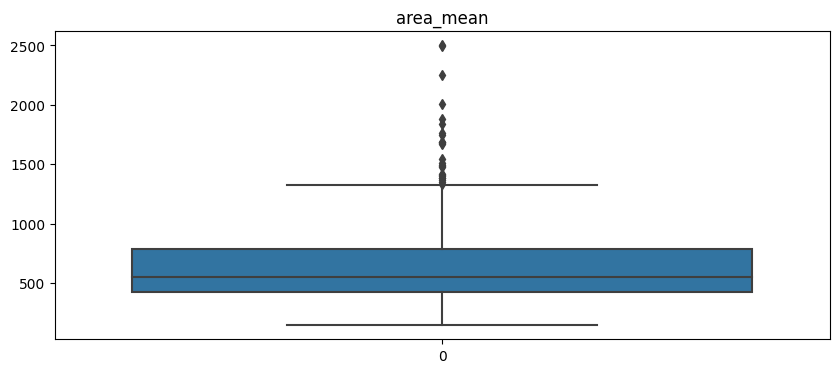

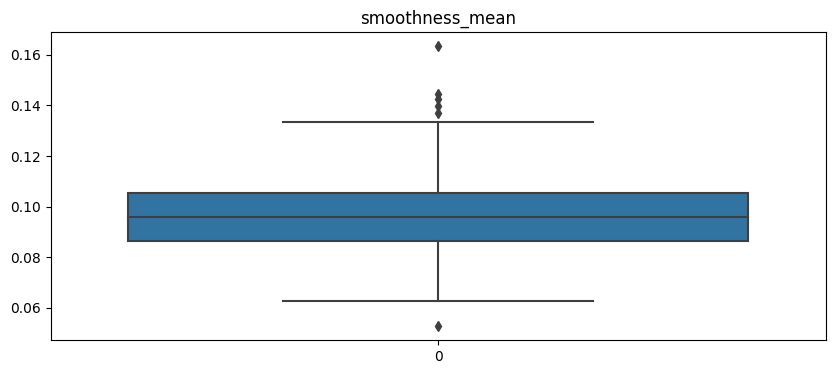

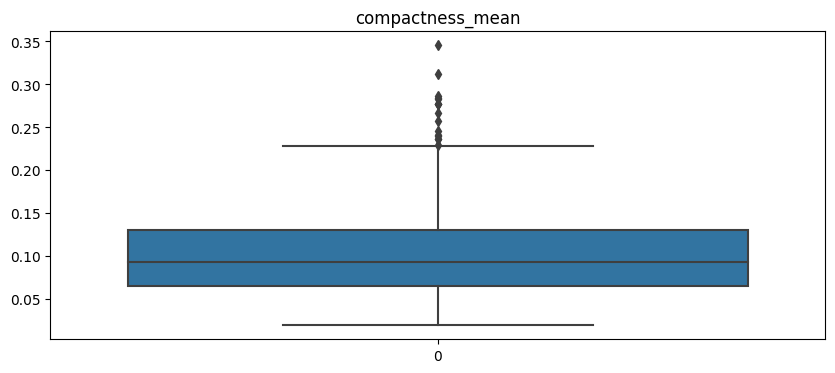

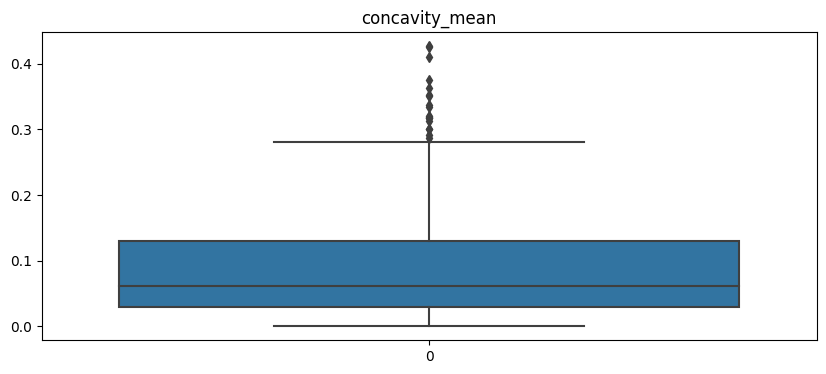

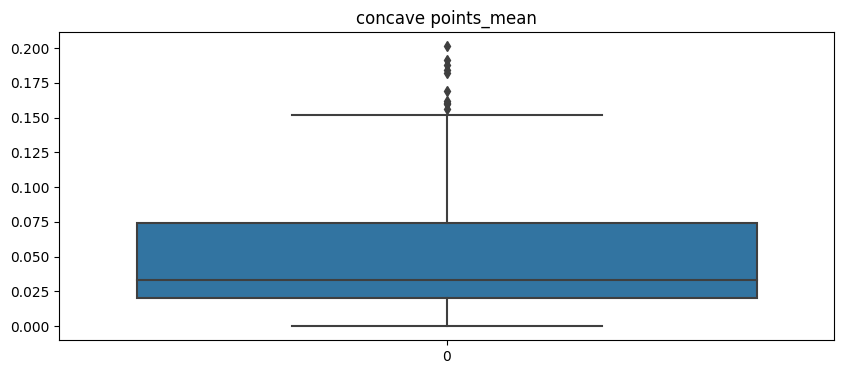

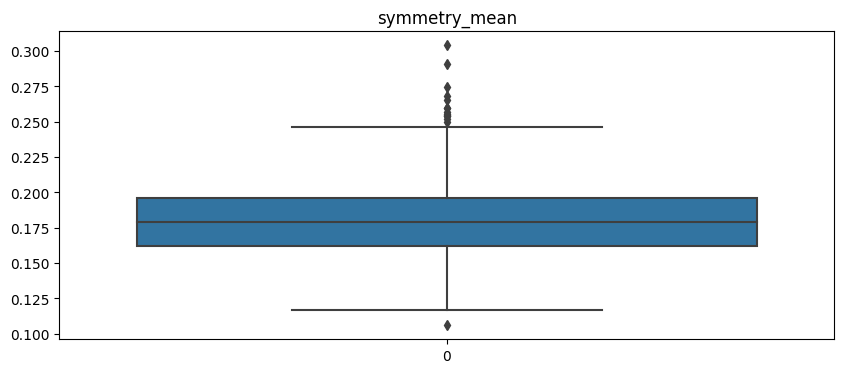

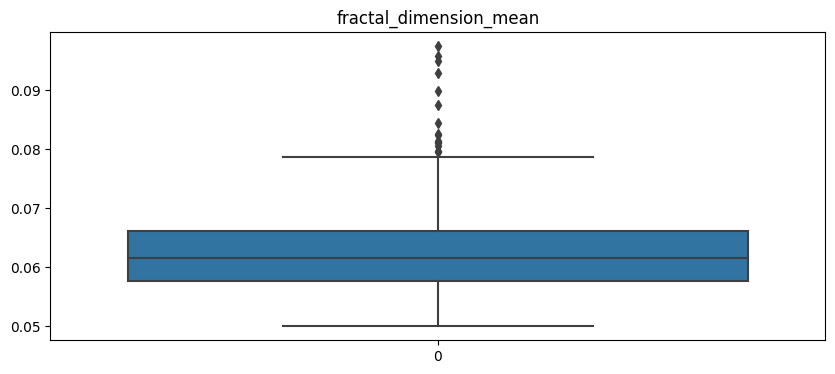

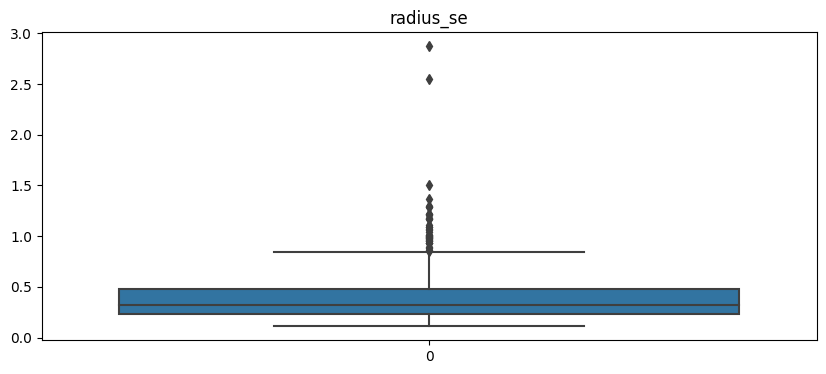

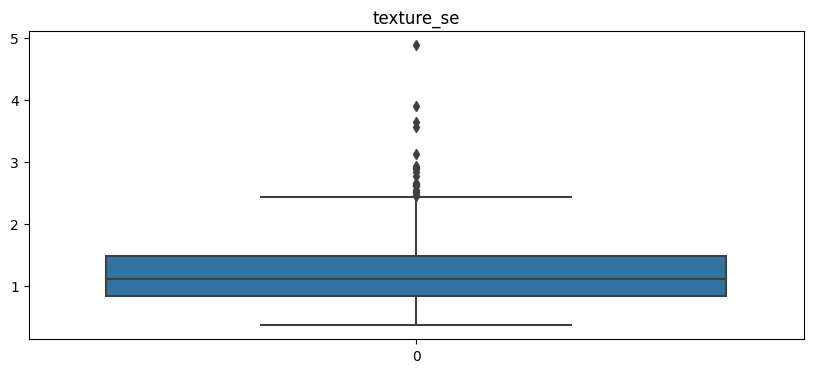

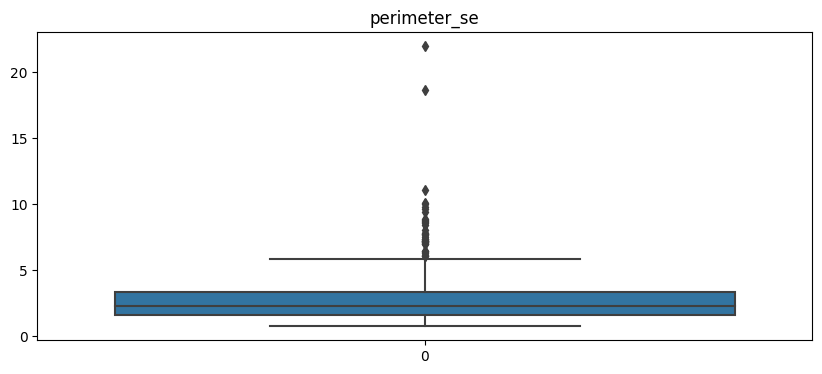

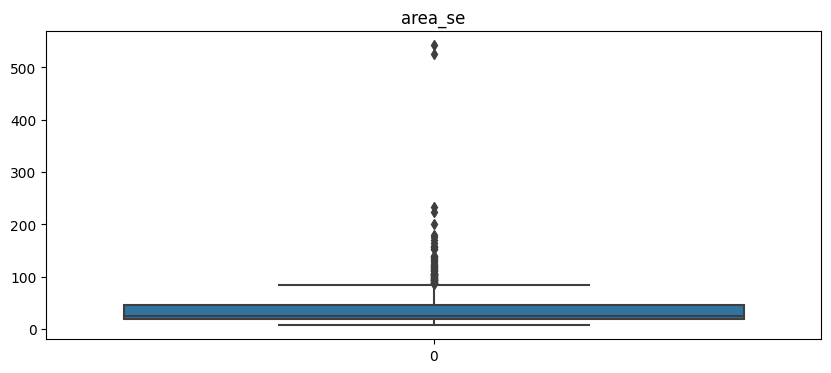

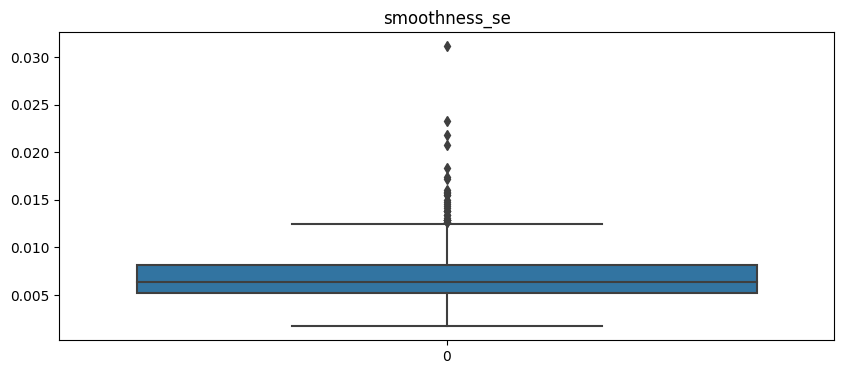

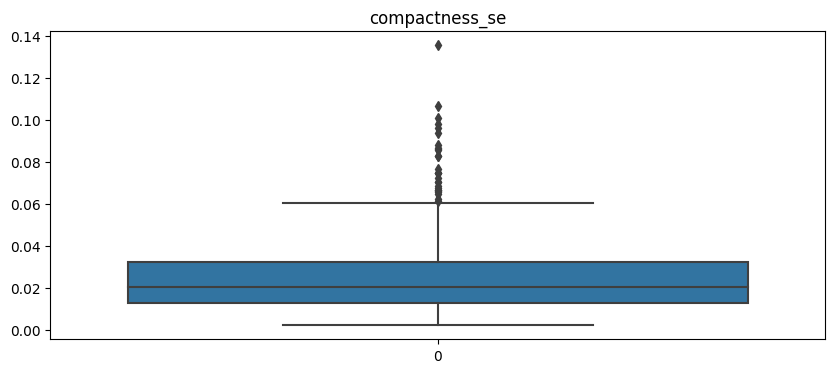

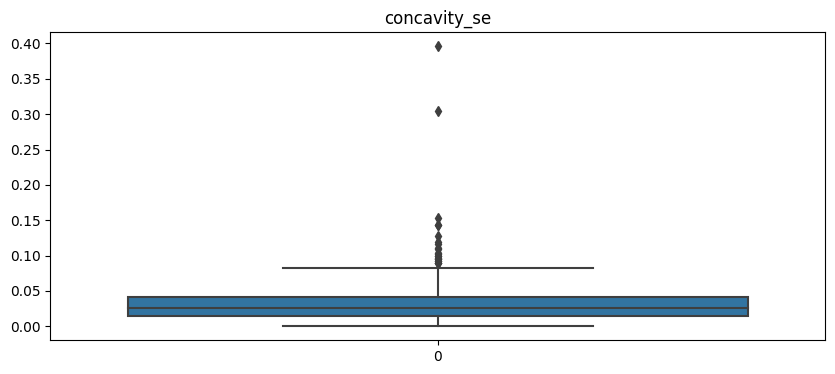

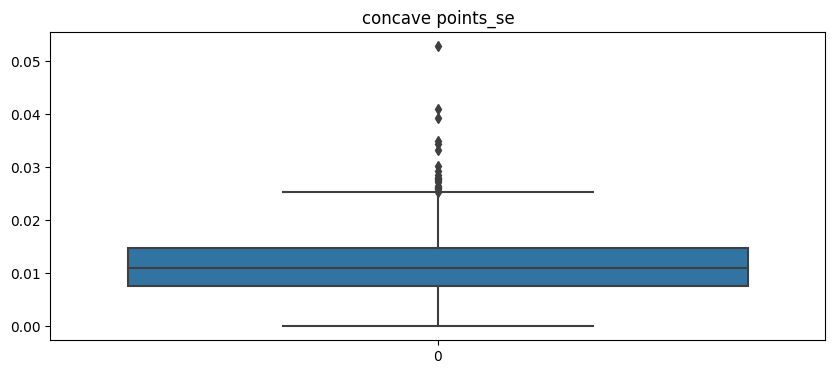

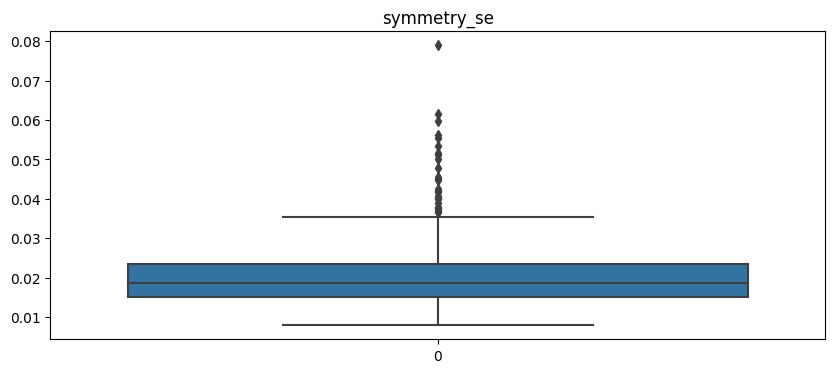

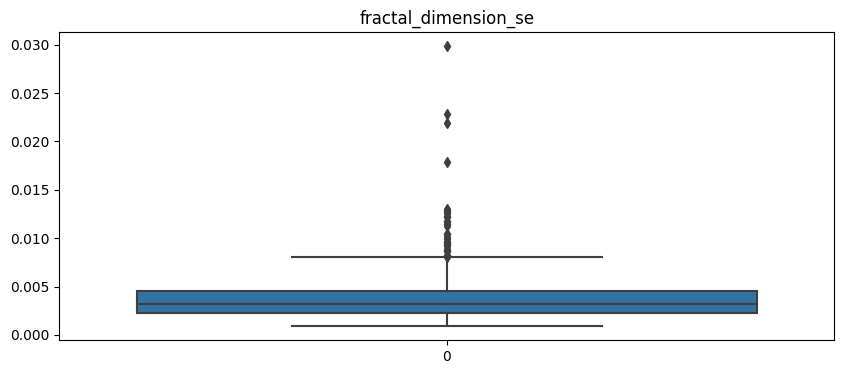

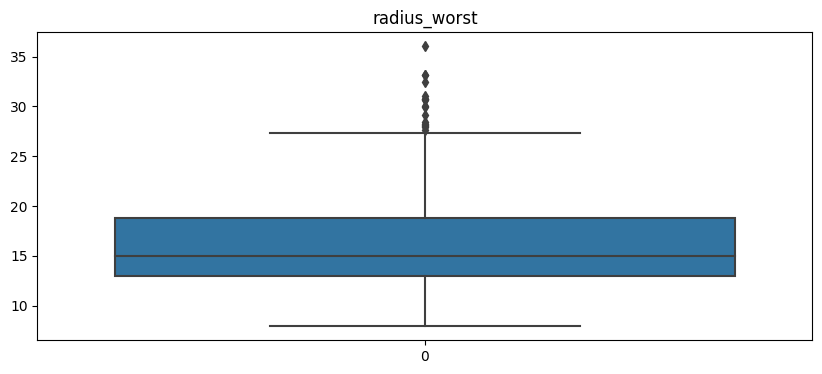

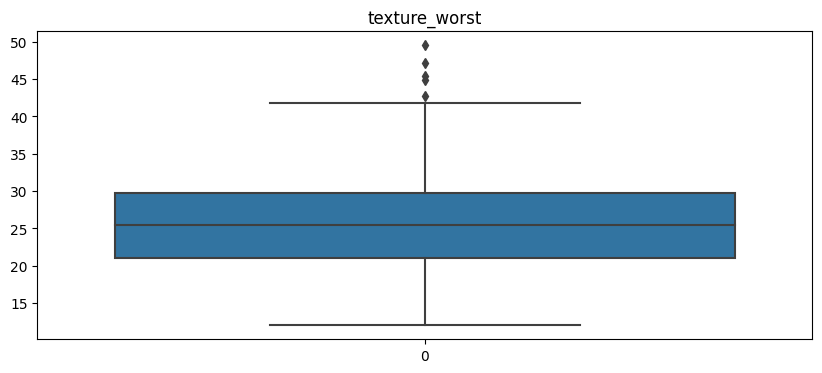

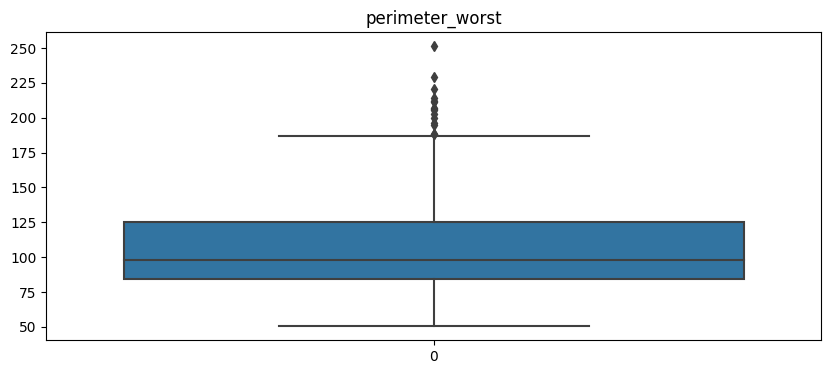

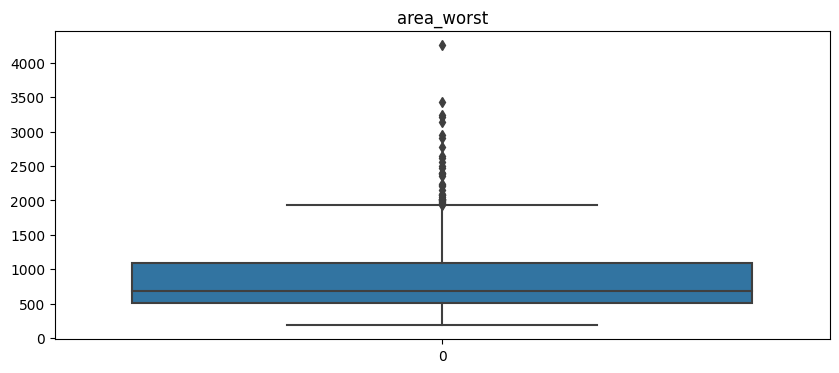

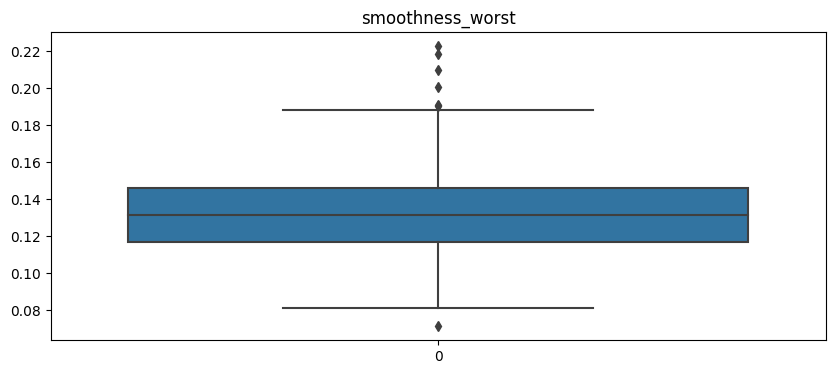

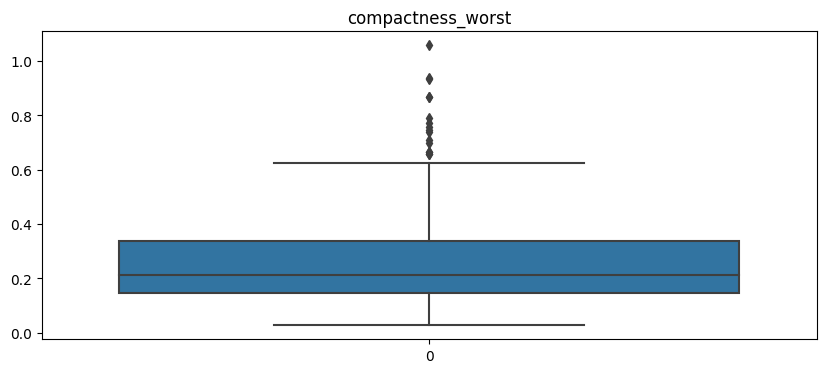

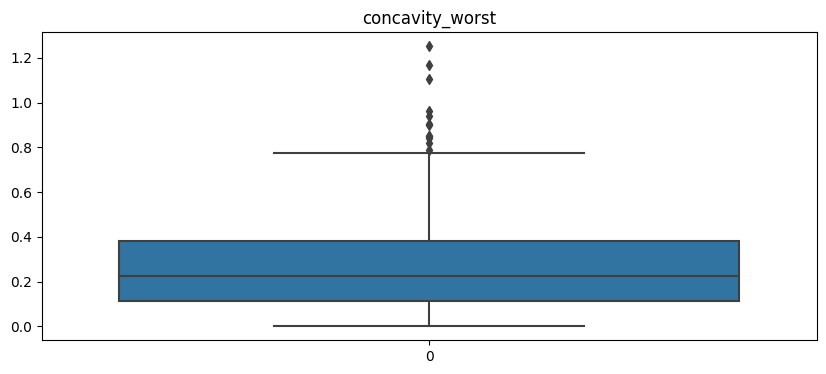

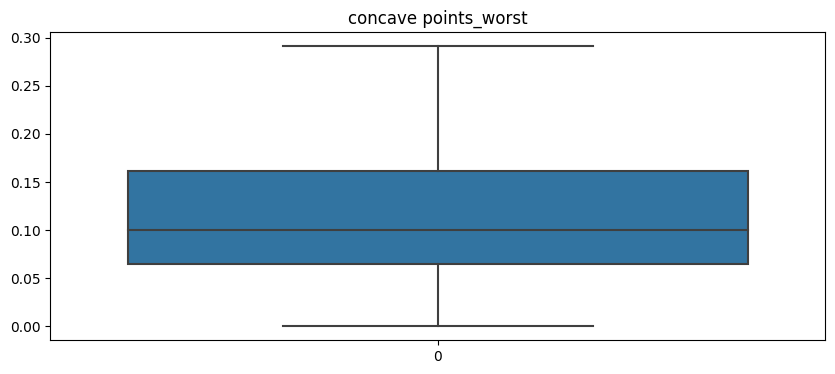

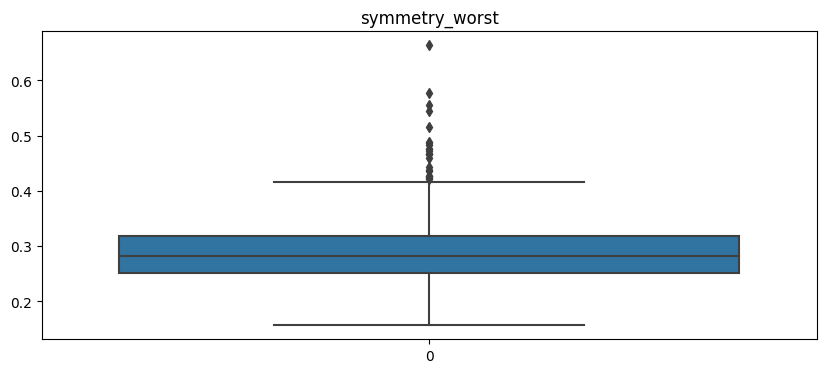

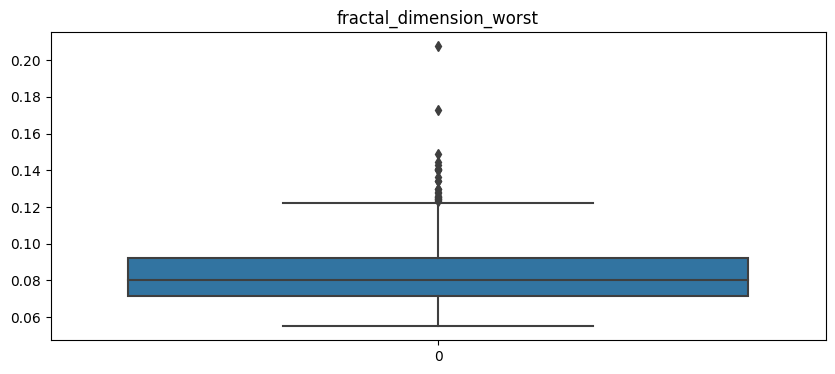

In [31]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
#     plt.title("Box Plot")
    plt.title(df.name)
    sns.boxplot(df)
    plt.show()


for i in list(df.columns):
    Box_plots(df[i])

Testing out models to see whats best

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1),
                                                   df['diagnosis'],
                                                   test_size = 0.25,
                                                   random_state=0)

In [11]:
pipe1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', SVC(random_state=42))
])

modelsvm = pipe1.fit(x_train, y_train)

y_pred_svm = modelsvm.predict(x_test)

In [12]:
pipe2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(random_state=42))
])

modellr = pipe2.fit(x_train, y_train)

y_pred_lr = modellr.predict(x_test)

In [13]:
pipe3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', KNeighborsClassifier())
])

modelkn = pipe3.fit(x_train, y_train)

y_pred_kn = modelkn.predict(x_test)

In [14]:
pipe4 = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

modelrf = pipe4.fit(x_train, y_train)

y_pred_rf = modelrf.predict(x_test)

In [15]:
pipe5 = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

modeldt = pipe5.fit(x_train, y_train)

y_pred_dt = modeldt.predict(x_test)

In [ ]:
pipe6 = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))
])

modelgb = pipe6.fit(x_train, y_train)

y_pred_gb = modelgb.predict(x_test)

In [17]:
# SVM: Support Vector Machine
# LR: Logistic Regression
# KNN: k-Nearest Neighbors
# RF: Random Forest
# DT: Decision Tree
# GB: Gradient Boosting
print('Accuracy Score SVM: {:.4f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score LR:  {:.4f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Accuracy score KN:  {:.4f}'.format(accuracy_score(y_test, y_pred_kn)))
print('Accuracy Score RF:  {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy Score DT:  {:.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print('Accuracy Score GB:  {:.4f}'.format(accuracy_score(y_test, y_pred_gb)))

Accuracy Score SVM: 0.9720
Accuracy score LR:  0.9580
Accuracy score KN:  0.9580
Accuracy Score RF:  0.9720
Accuracy Score DT:  0.9161
Accuracy Score GB:  0.9650


Decided to go with RandomForest, now trying to make it better by using RandomizedSearchCV with very big parameters

In [18]:
rfc = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [19]:
rfc_cv = RandomizedSearchCV(estimator = rfc,  param_distributions = params_grid, verbose = 0, cv = 5, n_iter = 100)

rfc_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [20]:
print(f'best: {rfc_cv.best_params_}')

best: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [21]:
rf_cv = RandomForestClassifier(n_estimators = 400, min_samples_split = 2, min_samples_leaf = 2, max_features = 'log2', max_depth = 10, bootstrap = False, random_state = 42)

modelrf_cv = rf_cv.fit(x_train, y_train)

y_pred_rf_cv = modelrf_cv.predict(x_test)

In [23]:
print('Accuracy Score RF:                  {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy Score RF + RandomSearchCV: {:.4f}'.format(accuracy_score(y_test, y_pred_rf_cv)))

Accuracy Score RF:                  0.9720
Accuracy Score RF + RandomSearchCV: 0.9860


Model improved a little, now the idea is to use GridSearchCV using similar values to the result of the Randomsearch to try and make it better

In [24]:
rfc = RandomForestClassifier(random_state=42)

n_estimators2 = [ 100, 150, 200, 300, 400]
max_features2 = ['log2','auto']
max_depth2 = [10,20]
min_samples_split2 = [2,3,4]
min_samples_leaf2 = [1, 2, 3]
bootstrap2 = [False]

params_grid2 = {'n_estimators': n_estimators2,
               'max_features': max_features2,
               'max_depth': max_depth2,
               'min_samples_split': min_samples_split2,
               'min_samples_leaf': min_samples_leaf2,
               'bootstrap': bootstrap2}

In [25]:
rfc_cv2 = GridSearchCV(estimator = rfc, param_grid = params_grid2, verbose = 0, cv = 10, n_jobs = -1)

rfc_cv2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [10, 20],
                         'max_features': ['log2', 'auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 300, 400]})

In [26]:
print(f'best: {rfc_cv2.best_params_}')

best: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [27]:
rf_cv2 = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', max_depth = 10, bootstrap = False,random_state=42)

modelrf_cv2 = rf_cv2.fit(x_train, y_train)

y_pred_rf_cv2 = modelrf_cv2.predict(x_test)

In [28]:
print('Accuracy Score RF:                                  {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy Score RF + RandomSearchCV:                 {:.4f}'.format(accuracy_score(y_test, y_pred_rf_cv)))
print('Accuracy Score RF + RandomSearchCV + GridSearchCV:  {:.4f}'.format(accuracy_score(y_test, y_pred_rf_cv2)))

Accuracy Score RF:                                  0.9720
Accuracy Score RF + RandomSearchCV:                 0.9860
Accuracy Score RF + RandomSearchCV + GridSearchCV:  0.9860


Unfortunately even after trying a couple of different grids the result was the same, never got higher than 98.60, so i just decided to keep it as the final score.

Evaluation

In [29]:
print(classification_report(y_test, y_pred_rf_cv2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



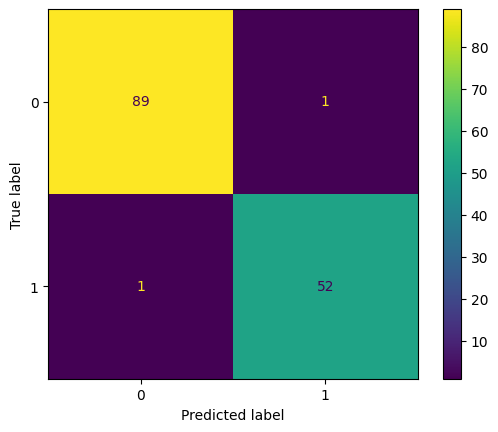

In [30]:
predictions = modelrf_cv2.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=modelrf_cv2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrf_cv2.classes_)
disp.plot()

plt.show()